<a href="https://colab.research.google.com/github/jeetbhatkar2004/Pasioneer/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#importing all the needed libs i think
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [6]:
path = "/content/drive/MyDrive/GOOG.csv"
df = pd.read_csv(path)
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-10,51.321999,51.813999,50.567001,51.582001,51.582001,39490000
1,2018-04-11,51.399502,51.568199,50.793499,50.998501,50.998501,29678000
2,2018-04-12,51.251999,52.034500,51.071751,51.625500,51.625500,27140000
3,2018-04-13,52.043999,52.320999,51.148998,51.463501,51.463501,24460000
4,2018-04-16,51.849998,52.161999,51.337002,51.898998,51.898998,24224000


<function matplotlib.pyplot.show(close=None, block=None)>

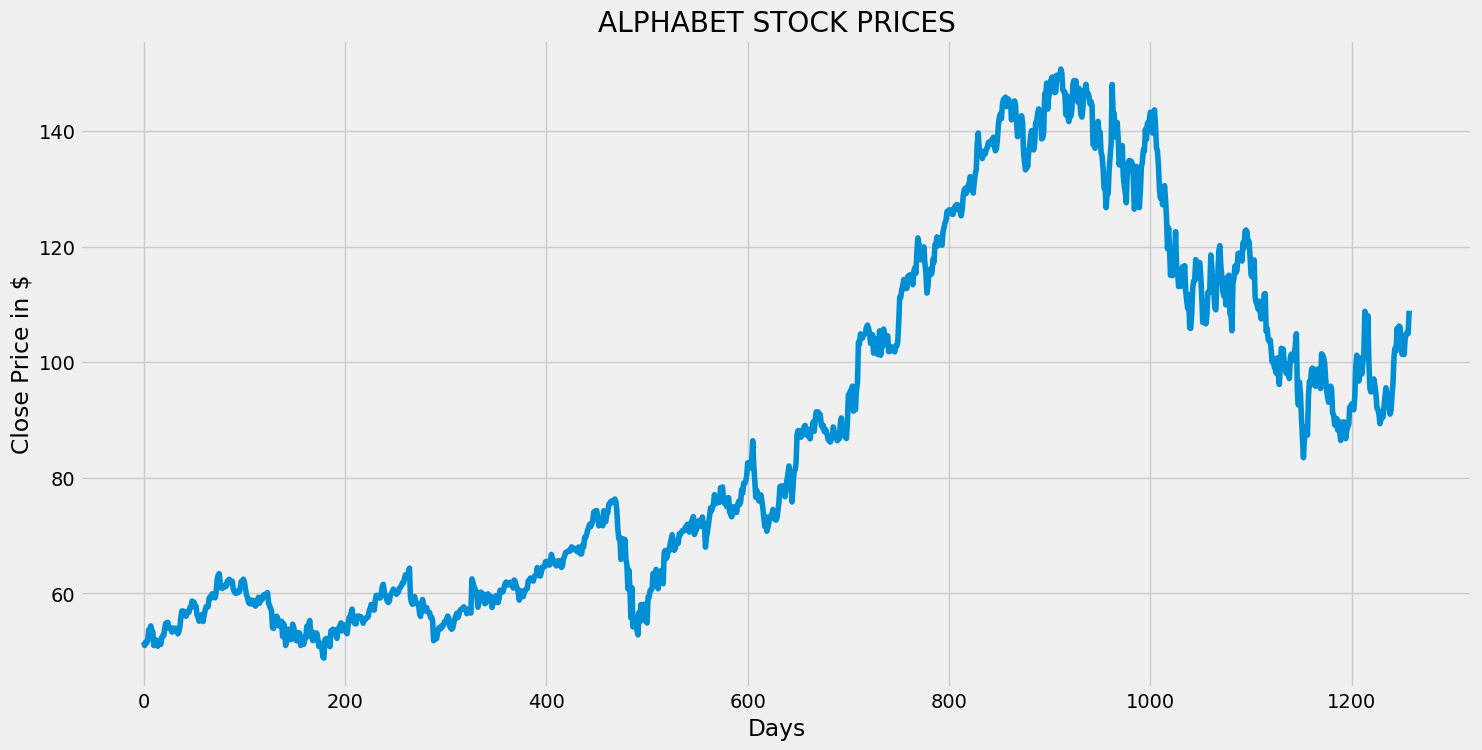

In [7]:
#Only using the closing data prices. 
#Visualization
plt.figure(figsize=(16,8))
plt.title("ALPHABET STOCK PRICES")
plt.xlabel("Days")
plt.ylabel("Close Price in $")
plt.plot(df['Adj Close'])
plt.show

In [ ]:
df_close = df.reset_index()['Close']
df_close

In [ ]:
plt.plot(df_close)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

In [ ]:
##splitting dataset into two parts. training and testing
training_size=int(len(df_close)*0.65)
test_size=len(df_close)-training_size
train_data=df_close[0:training_size,:]
test_data=df_close[training_size:len(df_close),:1]
train_data
test_data

In [ ]:
training_size, test_size

In [20]:
# convert an array of values into the needed dataset matrix for matriz multiplication to possible
def createDataset(dataset, timeStep=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-(timeStep+1)):
		a = dataset[i:(i+timeStep), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + timeStep, 0])
	return np.array(dataX), np.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
timeStep = 100
x_train, y_train = createDataset(train_data, timeStep)
x_test, y_test = createDataset(test_data, timeStep)
print(x_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)
print(x_test)


[[0.78869067 0.79259154 0.80230225 ... 0.96121616 0.96082847 0.92244205]
 [0.79259154 0.80230225 0.80652718 ... 0.96082847 0.92244205 0.95490587]
 [0.80230225 0.80652718 0.8172045  ... 0.92244205 0.95490587 0.91896795]
 ...
 [0.39096941 0.39352101 0.37870225 ... 0.52100141 0.51530942 0.54161023]
 [0.39352101 0.37870225 0.44514119 ... 0.51530942 0.54161023 0.55054077]
 [0.37870225 0.44514119 0.47026441 ... 0.54161023 0.55054077 0.55260165]]


In [35]:
LSTMmodel=Sequential()
LSTMmodel.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
LSTMmodel.add(LSTM(50,return_sequences=True))
LSTMmodel.add(LSTM(50))
LSTMmodel.add(Dense(1))

LSTMmodel.compile(loss='mean_squared_error',optimizer='adam')

In [36]:
LSTMmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
LSTMmodel.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 25s 2s/step - loss: 0.0219 - val_loss: 0.0363
Epoch 2/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0050 - val_loss: 0.0090
Epoch 3/100
12/12 [==============================] - 2s 132ms/step - loss: 0.0017 - val_loss: 0.0180
Epoch 4/100
12/12 [==============================] - 2s 131ms/step - loss: 0.0013 - val_loss: 0.0051
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 6/100
12/12 [==============================] - 2s 161ms/step - loss: 0.0011 - val_loss: 0.0082
Epoch 7/100
12/12 [==============================] - 2s 140ms/step - loss: 0.0011 - val_loss: 0.0067
Epoch 8/100
12/12 [==============================] - 2s 128ms/step - loss: 0.0011 - val_loss: 0.0082
Epoch 9/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0011 - val_loss: 0.0057
Epoch 10/100
12/12 [==============================] - 2s 129ms/step - loss: 0.0011 - val_loss

In [40]:
### Lets Do the prediction and check performance metrics
train_predict=LSTMmodel.predict(X_train)
test_predict=LSTMmodel.predict(X_test)

11/11 [==============================] - 0s 28ms/step


In [41]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.019613506458866576

In [44]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.03246612511475847

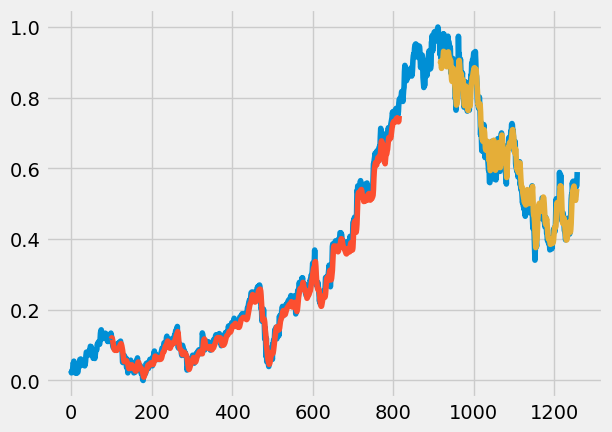

In [45]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [46]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = LSTMmodel.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = LSTMmodel.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5569424]
101
1 day input [0.46339475 0.48979372 0.4924434  0.48763469 0.4807651  0.46143203
 0.47615264 0.49077508 0.47880231 0.46555378 0.45760468 0.51658518
 0.51491686 0.51050071 0.50107954 0.47595632 0.45475869 0.44298216
 0.43434611 0.43915482 0.46162827 0.45632885 0.41599439 0.41265776
 0.39587628 0.40058683 0.40667137 0.38714206 0.40235331 0.38390351
 0.3694773  0.39391349 0.39175452 0.40127379 0.39155821 0.37251954
 0.3861607  0.39244148 0.39675948 0.426397   0.42296221 0.43169643
 0.42541565 0.42168638 0.44258968 0.49528939 0.5142299  0.49460243
 0.47026441 0.49411179 0.50932303 0.4822371  0.50107954 0.51638893
 0.58871619 0.553583   0.53640896 0.58125773 0.50235529 0.45780092
 0.4519127  0.45328661 0.4527959  0.47389544 0.46094132 0.44926294
 0.42433612 0.42188269 0.41471863 0.39783899 0.40519929 0.40716209
 0.40922296 0.42688765 0.44366912 0.4589786  0.44514119 0.44985183
 0.43032251 0.41412983 0.42050878 0.44592631 0.46849793 0.51285599
 0.52649707 0.5212958  0.55966747 

In [49]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
#resulting array is a 1,131. can be matrix multiplied

In [50]:
len(df_close)

1258

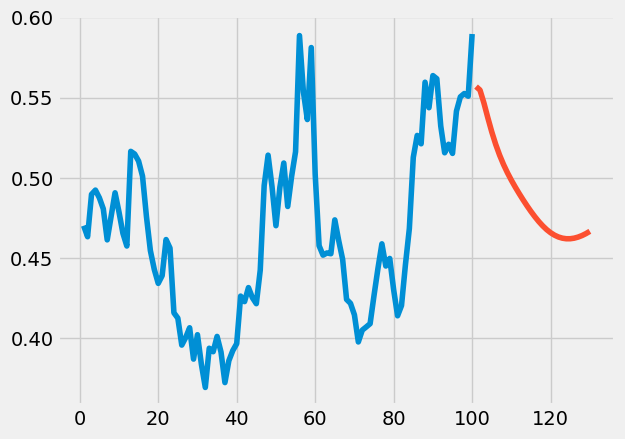

In [51]:
plt.plot(day_new,scaler.inverse_transform(df_close[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

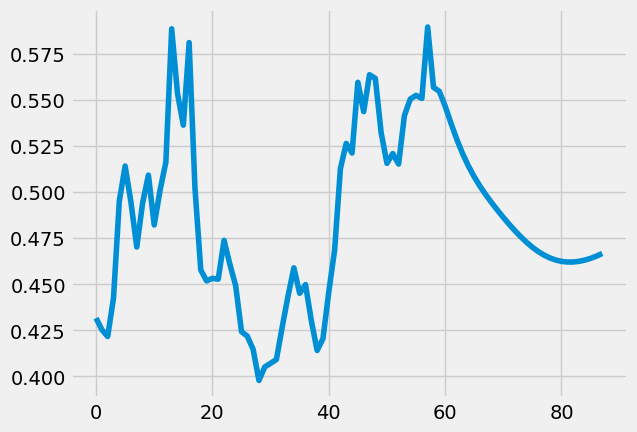

In [52]:
df_FINAL=df_close.tolist()
df_FINAL.extend(lst_output)
plt.plot(df_FINAL[1200:])

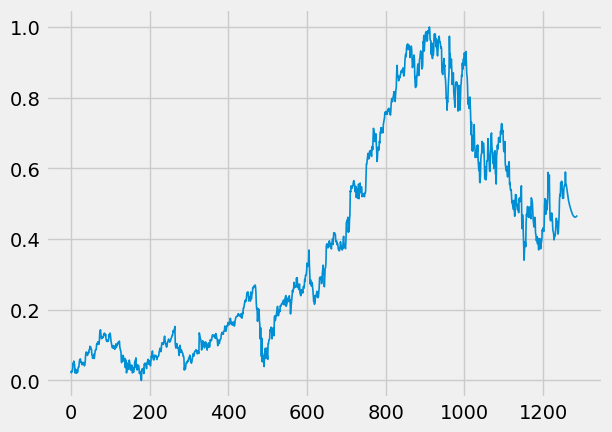

In [57]:

df3_FINAL=scaler.inverse_transform(df_FINAL).tolist()
plt.plot(df_FINAL, linewidth=1.2)

